In [1]:
import os
import numpy as np
import pandas as pd
from scipy.signal import resample
from scipy.stats import mode

os.environ["CUDA_VISIBLE_DEVICES"] = "-1"


In [2]:
data_dir = "../../data/dataset/"
subjects = os.listdir(data_dir)
gestures = ["Hello", "Good Morning"]

len_segment = 512
n_channels = 6
learning_rate = 3e-4

In [3]:
dataset = pd.DataFrame()

for subject in subjects:
    for gesture in gestures:
        gesture_dir = os.path.join(data_dir, subject, gesture)
        recordings = os.listdir(gesture_dir)
        for recording in recordings:
            file_path = os.path.join(gesture_dir, recording)
            data = pd.read_csv(file_path)
            data.drop(columns=["time"], inplace=True)
            data = data.apply(resample, args=(len_segment, None, 0))

            # ... calculating distance of the index finger
            data["drf1"] = ((data["rf1x"] - data["rpx"]).pow(2) + \
                    (data["rf1z"] - data["rpz"]).pow(2)).pow(0.5)

            data["dlf1"] = ((data["lf1x"] - data["lpx"]).pow(2) + \
                    (data["lf1z"] - data["lpz"]).pow(2)).pow(0.5)

            data["label"] = gestures.index(gesture)

            dataset = pd.concat([dataset, data])

dataset.reset_index(inplace=True)
dataset

,index,rpx,rpy,rpz,lpx,lpy,lpz,rf0x,rf0y,rf0z,...,lf2z,lf3x,lf3y,lf3z,lf4x,lf4y,lf4z,drf1,dlf1,label
0,0,-5.658768,22.123427,2.421432,2.057070,23.283700,2.098790,-12.551208,21.307191,0.825500,...,-7.966460,-0.774535,21.521300,-7.153920,-3.029410,19.832500,-0.972235,9.676584,7.476236,0
1,1,-30.323840,220.118135,12.595819,20.606789,233.245486,21.024721,-96.437214,207.865443,-7.180309,...,-79.804362,-7.758938,215.590567,-71.664707,-30.347248,198.672939,-9.739407,98.178913,74.893518,0
2,2,-33.870211,217.953539,13.822769,20.534611,232.428514,20.951079,-100.386009,207.585995,-4.932580,...,-79.524838,-7.731762,214.835433,-71.413693,-30.240952,197.977061,-9.705293,98.038599,74.631194,0
3,3,-35.814684,218.585355,13.667818,20.606789,233.245486,21.024721,-102.645344,208.401713,-4.756738,...,-79.804362,-7.758938,215.590567,-71.664707,-30.347248,198.672939,-9.739407,98.405438,74.893518,0
4,4,-38.728707,216.786569,14.160374,20.534611,232.428514,20.951079,-105.745229,208.280684,-3.546682,...,-79.524838,-7.731762,214.835433,-71.413693,-30.240952,197.977061,-9.705293,98.206109,74.631194,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5115,507,151.964575,188.353610,101.338335,-155.272818,279.467858,156.952235,88.794243,146.956092,116.990000,...,-27.544788,-224.595188,198.263148,-14.329949,-242.022610,199.297854,3.371960,58.434126,182.764704,1
5116,508,137.698681,163.421825,93.479184,-141.364993,248.456831,144.498368,82.130765,122.500208,107.979452,...,-22.201141,-205.875742,174.807082,-10.366145,-221.047976,176.289157,4.952251,50.613463,166.064264,1
5117,509,135.218332,159.443118,91.985931,-138.665159,243.069819,142.040575,80.786196,118.930659,106.186571,...,-21.360795,-202.210321,170.816528,-9.789197,-216.994733,172.347694,5.106890,49.852195,162.932976,1
5118,510,168.950472,213.564237,111.672523,-171.841234,311.427286,172.251025,97.356694,171.205800,127.747063,...,-32.239178,-247.274944,221.729145,-17.433688,-266.969155,222.550055,2.740327,69.197517,201.927085,1


In [4]:
features = dataset[["rpx", "rpz", "lpx", "lpz", "drf1", "dlf1", "label"]]
features

,rpx,rpz,lpx,lpz,drf1,dlf1,label
0,-5.658768,2.421432,2.057070,2.098790,9.676584,7.476236,0
1,-30.323840,12.595819,20.606789,21.024721,98.178913,74.893518,0
2,-33.870211,13.822769,20.534611,20.951079,98.038599,74.631194,0
3,-35.814684,13.667818,20.606789,21.024721,98.405438,74.893518,0
4,-38.728707,14.160374,20.534611,20.951079,98.206109,74.631194,0
...,...,...,...,...,...,...,...
5115,151.964575,101.338335,-155.272818,156.952235,58.434126,182.764704,1
5116,137.698681,93.479184,-141.364993,144.498368,50.613463,166.064264,1
5117,135.218332,91.985931,-138.665159,142.040575,49.852195,162.932976,1
5118,168.950472,111.672523,-171.841234,172.251025,69.197517,201.927085,1


In [5]:
import tensorflow as tf

from tensorflow.keras import layers, models, losses, optimizers
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

2022-06-10 02:19:05.654879: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [6]:
scaler = MinMaxScaler()
X = features.drop(columns=["label"]).to_numpy()
X = scaler.fit_transform(X)
X = X.reshape((-1, len_segment, n_channels))
y = features["label"].to_numpy().reshape((-1, len_segment))
y, _ = mode(y, axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)


In [7]:
def conv_block_1d():
    inputs = layers.Input(shape=(512, 1))
    x = layers.BatchNormalization()(inputs)
    x = layers.Conv1D(8, 3, activation="selu")(x)
    x = layers.Conv1D(8, 3, activation="selu")(x)
    x = layers.MaxPool1D(5)(x)
    x = layers.Conv1D(16, 3, activation="selu")(x)
    x = layers.Conv1D(16, 3, activation="selu")(x)
    x = layers.MaxPool1D(5)(x)
    x = layers.Flatten()(x)
    output = layers.Dense(32)(x)

    return inputs, output

def get_model(n_channels: int):
    inputs = []
    features = []

    for _ in range(n_channels):
        input_1d, features_1d = conv_block_1d()
        inputs.append(input_1d)
        features.append(features_1d)

    x = layers.concatenate(features, axis=-1)
    x = layers.Dropout(0.2)(x)
    x = layers.Dense(64, activation="relu")(x)
    x = layers.Dropout(0.2)(x)
    output = layers.Dense(len(gestures), activation="softmax")(x)

    return models.Model(inputs, output)

In [8]:
model = get_model(n_channels=n_channels)

loss = losses.SparseCategoricalCrossentropy(from_logits=False)
optimizer = optimizers.Adam(learning_rate=learning_rate)
model.compile(
    loss=loss,
    optimizer=optimizer,
    metrics=["accuracy"]
)

2022-06-10 02:19:06.800834: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-06-10 02:19:06.800870: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: Andromeda
2022-06-10 02:19:06.800876: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: Andromeda
2022-06-10 02:19:06.801030: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 510.73.5
2022-06-10 02:19:06.801051: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 510.73.5
2022-06-10 02:19:06.801056: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 510.73.5
2022-06-10 02:19:06.801369: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions i

In [9]:
history = model.fit(
    x=np.split(X_train, n_channels, axis=-1),
    y=y_train,
    validation_data=(
        np.split(X_test, n_channels, axis=-1),
        y_test
    ),
    batch_size=4,
    epochs=200,
    verbose=0
)

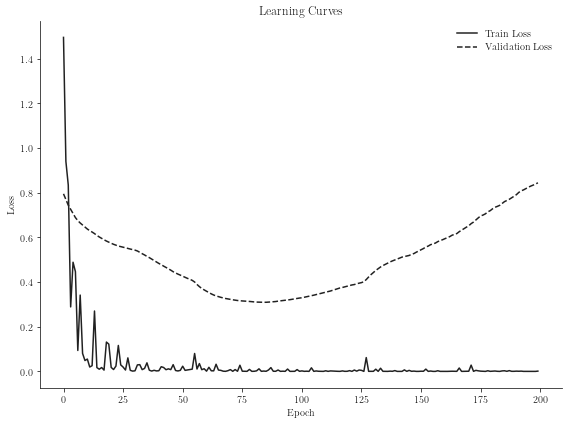

In [10]:
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "font.size": 22,
    "text.color": "#212121",
    "axes.edgecolor": "#212121",
    "xtick.color": "#212121",
    "ytick.color": "#212121",
    "axes.labelcolor": "#212121",
    'legend.frameon': False,
})

fig = plt.figure(figsize=(8, 6))
ax = fig.gca()
ax.plot(history.history["loss"], "-", color="#212121", label="Train Loss")
ax.plot(history.history["val_loss"], "--", color="#212121", label="Validation Loss")
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title("Learning Curves")
plt.legend()
plt.tight_layout()
plt.show()

In [11]:
tf.keras.backend.clear_session()

In [12]:
import joblib
joblib.dump(scaler, "../../model/scaler.joblib")
model.save("../../model/stack_cnn")

INFO:tensorflow:Assets written to: ../../model/stack_cnn/assets


INFO:tensorflow:Assets written to: ../../model/stack_cnn/assets
